# _**Battle of the Neighborhoods in Singapore**_

## _1.0 Introduction_

__1.1 Background:__

Singapore is a city-state country located off of the southern tip of the Malaysian peninsula. With clean streets free of littering and vandalism enforced by laws, Singapore has been constantly ranked as one of the top cities to live in around the world. Singapore not only acts as the economic hub of Southeast Asia, but it also has offers great educational opportunities.

There is a total of 27 core neighborhoods in Singapore, namely the following:

|Neighborhoods|
|---|
|Bukit Batok|
|Bedok |
|Bishan |
|Bukit Merah |
|Bukit Panjang |
|Bukit Timah|
|Choa Chu Kang|
|Clementi|
|Central Area|
|Geylang|
|Hougang|
|Jurong East|
|Jurong West|
|Kallang/Whampoa|
|Marine Parade|
|Punggol|
|Pasir Ris|
|Queenstown|
|Sembawang|
|Serangoon|
|Sengkang|
|Tampines|
|Tengah|
|Toa Payoh|
|Woodlands|
|Yishun|

Each of the above neighborhood represents a different geographical region in Singapore, and within each neighborhood, there are many public services and businesses that facilite the daily lives of local Singaporeans.

__1.2 Problem Statement:__ 

The goal of this project is to analyze which neighborhood in Singapore is the most suitable for a middle-income family. The neighborhoods will be evaluated based on the criteria listed below:

- Average household income of neighborhood,
- Average housing price (3 BR or more),
- School distribution,
- Public transit access,
- Access to grocery stores/markets,
- Access to restaurants and hawker centres, and
- Access to community and entertainment facilities.


The neighborhoods will be evaluated against each other and the median based on a normalized value. Then, a recommendation will be made, using a weighted matrix. 

### Preliminary Neighborhood Visualization in Folium

In [1]:
pip install geopy

     |████████████████████████████████| 112kB 22.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install BeautifulSoup4

     |████████████████████████████████| 112kB 6.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install lxml

     |████████████████████████████████| 5.8MB 9.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import all libraries and tools

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [6]:
# visualization in map

address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Singapore are 1.357107, 103.8194992.


The map below provides an overview of Singapore. 

In [7]:
# Set up Foursquare API connection
CLIENT_ID = 'W30LZUZUDPKFJP1ZXHLSNHQQZHBOVX4TKXZHPO41BXBCHCHR' # your Foursquare ID
CLIENT_SECRET = 'YSBZOBJFTMGSSA2KXJWNMO5IIPVLTWG2QPJGCQSZPEWTW1RV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [8]:
# Areas in Singapore in a table

areas_data = {'Areas':['Ang Mo Kio', 'Bukit Batok', 'Bedok', 'Bishan', 'Bukit Merah', 'Bukit Panjang',
        'Choa Chu Kang', 'Clementi', 'Central Area', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
        'Kallang/Whampoa', 'Punggol', 'Pasir Ris', 'Queenstown', 'Sembawang', 'Serangoon', 'Sengkang',
        'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun']
             }

# Creating a new table
sg_areas = pd.DataFrame(areas_data, columns = ['Areas'])

sg_areas

,Areas
0,Ang Mo Kio
1,Bukit Batok
2,Bedok
3,Bishan
4,Bukit Merah
5,Bukit Panjang
6,Choa Chu Kang
7,Clementi
8,Central Area
9,Geylang


In [9]:
# Create a table with just neighborhoods for future use

areas = {'Areas':['Ang Mo Kio', 'Bukit Batok', 'Bedok', 'Bishan', 'Bukit Merah', 'Bukit Panjang',
        'Choa Chu Kang', 'Clementi', 'Central Area', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
        'Kallang/Whampoa', 'Punggol', 'Pasir Ris', 'Queenstown', 'Sembawang', 'Serangoon', 'Sengkang',
        'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun']
             }

# Creating a new table
sg_neighborhoods = pd.DataFrame(areas, columns = ['Areas'])

# No printing

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='Singapore_explorer')
sg_areas['Coordinates'] = sg_areas['Areas'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

sg_areas

,Areas,Coordinates
0,Ang Mo Kio,"(1.3700733, 103.8495157)"
1,Bukit Batok,"(1.3490572, 103.7495906)"
2,Bedok,"(1.3239765, 103.930216)"
3,Bishan,"(1.3514521, 103.8482496)"
4,Bukit Merah,"(4.5592879, 101.0255816)"
5,Bukit Panjang,"(1.378629, 103.7621358)"
6,Choa Chu Kang,"(1.3847493, 103.7445341)"
7,Clementi,"(1.3151003, 103.7652311)"
8,Central Area,"(36.5070827, -79.7447575)"
9,Geylang,"(1.3181862, 103.8870563)"


In [11]:
# fix up the incorrect coordinates after observation

In [12]:
# change type to string
sg_areas['Coordinates']=sg_areas.Coordinates.astype(str)

In [13]:
sg_areas['Coordinates']=sg_areas['Coordinates'].str.strip('()')

lat = []
lon = []

# For each row in a varible,
for row in sg_areas['Coordinates']:
        lat.append(str(row.split(', ')[0]))
        lon.append(str(row.split(', ')[1]))

# Create two new columns from lat and lon
sg_areas['Area_Latitude'] = lat
sg_areas['Area_Longitude'] = lon

sg_areas

,Areas,Coordinates,Area_Latitude,Area_Longitude
0,Ang Mo Kio,"1.3700733, 103.8495157",1.3700733,103.8495157
1,Bukit Batok,"1.3490572, 103.7495906",1.3490572,103.7495906
2,Bedok,"1.3239765, 103.930216",1.3239765,103.930216
3,Bishan,"1.3514521, 103.8482496",1.3514521,103.8482496
4,Bukit Merah,"4.5592879, 101.0255816",4.5592879,101.0255816
5,Bukit Panjang,"1.378629, 103.7621358",1.378629,103.7621358
6,Choa Chu Kang,"1.3847493, 103.7445341",1.3847493,103.7445341
7,Clementi,"1.3151003, 103.7652311",1.3151003,103.7652311
8,Central Area,"36.5070827, -79.7447575",36.5070827,-79.7447575
9,Geylang,"1.3181862, 103.8870563",1.3181862,103.8870563


In [14]:
sg_areas=sg_areas.dropna()

In [15]:
sg_areas['Area_Latitude'] = sg_areas['Area_Latitude'].astype(float)
sg_areas['Area_Longitude'] = sg_areas['Area_Longitude'].astype(float)

In [16]:
# create map of Singapore
sg_overview_map = folium.Map(location=[latitude, longitude], zoom_start=10.5)
sg_overview_map

# add markers
markers_colors = []
for lat, lon, poi in zip(sg_areas['Area_Latitude'], 
                         sg_areas['Area_Longitude'], 
                         sg_areas['Areas']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label).add_to(sg_overview_map)

sg_overview_map

# _2.0 Data_

We will be analyzing the following data from Singapore:

__2.1 Average household income:__
- Average income in different neighborhoods of Singapore:
https://www.asiaone.com/singapore/what-average-income-singaporeans-living-different-neighbourhoods

This information shows the median annual salary recommended to purchase a 4BR HDB apartment in each neighborhood.

- Average monthly household income based on the types of dwelling:
https://www.tablebuilder.singstat.gov.sg/publicfacing/createSpecialTable.action?refId=16779

The information shows the average monthly household income of different dwelling types (i.e. 2 BR HDB, 3 BR HDB, 4 BR HDB, condominiums, etc.). This value can be used as a benchmark for analysis.

__2.2 Average housing price:__
- Average housing price in different neighborhoods of Singapore:
https://www.asiaone.com/singapore/what-average-income-singaporeans-living-different-neighbourhoods

This information shows the average housing price for a 4BR HDB apartment in 24 neighborhoods of Singapore, as well as the recommended down payment that is required. Only the average housing price will be used.

- HDB Data in Singapore with Neighborhoods: (used in neighborhoods in section 3.1)
https://data.gov.sg/dataset/hdb-property-information?view_id=82d8145d-daa6-460b-b269-9848c99ed32d&resource_id=482bfa14-2977-4035-9c61-c85f871daf4e

The above link contains information regarding all HDBs in Singapore. This information can be used to determine the number of HDB buildings in each neighborhood.

__2.3 School Distribution:__ (From Ministry of Education)
- https://data.gov.sg/dataset/school-directory-and-information?view_id=ba7c477d-a077-4303-96a1-ac1d4f25b190&resource_id=ede26d32-01af-4228-b1ed-f05c45a1d8ee

The above link contains school information as well as neighborhood information. This can be used to learn about the accessibility to educational institution in each neighborhood of Singapore.

__2.4 Public Transit Accessibility:__
- MRT/LRT/bus stop count: Foursquare API

The number of bus stops, MRT stations and LRT stations is a good indicator to the connectivity of each neighborhood. Access to transit can improve family mobility and sustainability. 

However, as the retrieval of bus stops, MRT and LRT stations from Foursquare has been limited, public transit accessibility will not be used in the final evaluation of the neighborhood.

__2.5 Grocery Stores/Markets:__
- Foursquare API

Having grocery stores and supermarkets within walkable distance is important to the daily living of families. Foursquare will be used to retrieve grocery store and supermarket information within each neighborhood.

__2.6 Restaurants/Hawker Centres:__
- Foursquare API

Whether it is for convenient or for special occasions, having restaurants and hawker centres outside the doorstep can bring convenience to family living. 

__2.7 Entertainment/Community Facilities:__
- Foursquare API

Foursquare API will be used to retrieve information within each neighborhood with regards to entertainment and community services, such as swimming pools and theatres. 

### Average Household Income and House Resale Price by Neighborhood Area

Data from Singapore Statistics have been used for average HDB household income. 
https://www.tablebuilder.singstat.gov.sg/publicfacing/createSpecialTable.action?refId=16779

The average monthly household income for a 3 BR HDB apartment and 4 BD HDB apartment is 6,586 SGD and 9,543 SGD respectively, from Singapore Statistics.

More details of income by neighborhood is retrieved from https://www.asiaone.com/singapore/what-average-income-singaporeans-living-different-neighbourhoods. The average household income and the average apartment resale price is provided for HDB apartments with 4 bedrooms in each neighborhood area. Since the data is provided in an image format, it will be manually entered into a table.

In [17]:
# household income and resale price table creation

household = {'Areas':['Ang Mo Kio', 'Bukit Batok', 'Bedok', 'Bishan', 'Bukit Merah', 'Bukit Panjang',
        'Choa Chu Kang', 'Clementi', 'Central Area', 'Geylang', 'Hougang', 'Jurong East', 'Jurong West',
        'Kallang/Whampoa', 'Punggol', 'Pasir Ris', 'Queenstown', 'Sembawang', 'Serangoon', 'Sengkang',
        'Tampines', 'Toa Payoh', 'Woodlands', 'Yishun'], 
             'Income (SGD)':[61909,51142,54911,78059,89163,49527,44413,75031,117089,64601,50066,54843,49124,
                            80751,59419,54628,99324,45073,55180,55180,58006,78059,44413,45759],
             '4BD Resale (k SGD)':[460,380,408,580,662.5,368,330,557.5,870,480,372,407.5,365,600,441.5,
                                   405.9,738,334.9,410,410,431,580,330,340]
             }

# Creating a new table
housing = pd.DataFrame(data=household)

housing

,Areas,Income (SGD),4BD Resale (k SGD)
0,Ang Mo Kio,61909,460.0
1,Bukit Batok,51142,380.0
2,Bedok,54911,408.0
3,Bishan,78059,580.0
4,Bukit Merah,89163,662.5
5,Bukit Panjang,49527,368.0
6,Choa Chu Kang,44413,330.0
7,Clementi,75031,557.5
8,Central Area,117089,870.0
9,Geylang,64601,480.0


In [18]:
norm_housing = housing.copy()
norm_housing = norm_housing.drop(columns = ['Income (SGD)'])
norm_housing = norm_housing.set_index('Areas')
norm_housing

,4BD Resale (k SGD)
Areas,
Ang Mo Kio,460.0
Bukit Batok,380.0
Bedok,408.0
Bishan,580.0
Bukit Merah,662.5
Bukit Panjang,368.0
Choa Chu Kang,330.0
Clementi,557.5
Central Area,870.0


In [19]:
# normalizing housing price data
from sklearn import preprocessing

housing_norm = (norm_housing - norm_housing.mean()) / (norm_housing.max() - norm_housing.min())
housing_norm = abs(housing_norm)
housing_norm = housing_norm.reset_index()
housing_norm = housing_norm.rename(columns={'4BD Resale (k SGD)':'Norm Housing Price','Areas':'Neighborhood'})
housing_norm['Neighborhood'] = housing_norm['Neighborhood'].str.upper() 
housing_norm

,Neighborhood,Norm Housing Price
0,ANG MO KIO,0.017114
1,BUKIT BATOK,0.165262
2,BEDOK,0.113410
3,BISHAN,0.205108
4,BUKIT MERAH,0.357886
5,BUKIT PANJANG,0.187485
6,CHOA CHU KANG,0.257855
7,CLEMENTI,0.163441
8,CENTRAL AREA,0.742145
9,GEYLANG,0.019923


Regression models will be used to study the effect of income on housing price, based on data from the above table in various neighborhoods.

### School Information for Each Neighborhood

In [20]:
pip install xlrd

     |████████████████████████████████| 112kB 26.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
school_data = pd.read_csv ('schools.csv') 
df_school = pd.DataFrame(school_data, columns= ['school_name','dgp_code'])
print(df_school)

                        school_name       dgp_code
0          ADMIRALTY PRIMARY SCHOOL      WOODLANDS
1        ADMIRALTY SECONDARY SCHOOL      WOODLANDS
2      AHMAD IBRAHIM PRIMARY SCHOOL         YISHUN
3    AHMAD IBRAHIM SECONDARY SCHOOL         YISHUN
4                    AI TONG SCHOOL         BISHAN
..                              ...            ...
340          ZHANGDE PRIMARY SCHOOL    BUKIT MERAH
341         ZHENGHUA PRIMARY SCHOOL  BUKIT PANJANG
342       ZHENGHUA SECONDARY SCHOOL  BUKIT PANJANG
343         ZHONGHUA PRIMARY SCHOOL      SERANGOON
344       ZHONGHUA SECONDARY SCHOOL      SERANGOON

[345 rows x 2 columns]


In [22]:
grouped_schools = df_school.groupby(['dgp_code']).count()
grouped_schools = grouped_schools.rename(columns={'school_name':'Count'})
grouped_schools = grouped_schools.rename(index={'CENTRAL':'CENTRAL AREA','KALLANG':'KALLANG/WHAMPOA',
                                               'SENG KANG':'SENGKANG'})
grouped_schools = grouped_schools.drop(index={'na','NOVENA','MARINE PARADE','BUKIT TIMAH'})
grouped_schools = grouped_schools.reset_index()
grouped_schools = grouped_schools.rename(columns={'dgp_code':'Areas'})
grouped_schools

,Areas,Count
0,ANG MO KIO,14
1,BEDOK,22
2,BISHAN,10
3,BUKIT BATOK,13
4,BUKIT MERAH,11
5,BUKIT PANJANG,13
6,CENTRAL AREA,7
7,CHOA CHU KANG,15
8,CLEMENTI,10
9,GEYLANG,9


In [23]:
grouped_schools.shape

(24, 2)

In [24]:
#prepare dataframe for normalization
norm_school = grouped_schools.copy()
norm_school = norm_school.set_index('Areas')
norm_school

,Count
Areas,
ANG MO KIO,14
BEDOK,22
BISHAN,10
BUKIT BATOK,13
BUKIT MERAH,11
BUKIT PANJANG,13
CENTRAL AREA,7
CHOA CHU KANG,15
CLEMENTI,10


In [25]:
# normalizing school data
from sklearn import preprocessing

schools_norm = (norm_school - norm_school.mean()) / (norm_school.max() - norm_school.min())
schools_norm = abs(schools_norm)
schools_norm = schools_norm.reset_index()
schools_norm = schools_norm.rename(columns={'Count':'Norm School Count','Areas':'Neighborhood'})
schools_norm['Neighborhood'] = schools_norm['Neighborhood'].str.upper() 
schools_norm

,Neighborhood,Norm School Count
0,ANG MO KIO,0.041667
1,BEDOK,0.486111
2,BISHAN,0.180556
3,BUKIT BATOK,0.013889
4,BUKIT MERAH,0.125000
5,BUKIT PANJANG,0.013889
6,CENTRAL AREA,0.347222
7,CHOA CHU KANG,0.097222
8,CLEMENTI,0.180556
9,GEYLANG,0.236111


### Get Venue Details: Foursquare API

In [26]:
# Set up Foursquare API connection
CLIENT_ID = 'W30LZUZUDPKFJP1ZXHLSNHQQZHBOVX4TKXZHPO41BXBCHCHR' # your Foursquare ID
CLIENT_SECRET = 'YSBZOBJFTMGSSA2KXJWNMO5IIPVLTWG2QPJGCQSZPEWTW1RV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

The neighborhoods are about 5km by 5km in Singapore, measured from Google Maps. We will use 2000m as the radius to ensure that we cover enough basis for each neighborhood. 

In [27]:
#Get Venue function
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [28]:
# Singapore Venues Listing
sg_venues = getNearbyVenues(names=sg_areas['Areas'],
                                   latitudes=sg_areas['Area_Latitude'],
                                   longitudes=sg_areas['Area_Longitude']
                                  )

Ang Mo Kio
Bukit Batok
Bedok
Bishan
Bukit Merah
Bukit Panjang
Choa Chu Kang
Clementi
Central Area
Geylang
Hougang
Jurong East
Jurong West
Kallang/Whampoa
Punggol
Pasir Ris
Queenstown
Sembawang
Serangoon
Sengkang
Tampines
Toa Payoh
Woodlands
Yishun


In [29]:
sg_venues.head(50)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ang Mo Kio,1.370073,103.849516,FairPrice Xtra,1.369279,103.848886,Supermarket
1,Ang Mo Kio,1.370073,103.849516,Bishan - Ang Mo Kio Park,1.362219,103.846250,Park
2,Ang Mo Kio,1.370073,103.849516,Aramsa ~ The Garden Spa,1.362292,103.847602,Spa
3,Ang Mo Kio,1.370073,103.849516,Old Chang Kee,1.369094,103.848389,Snack Place
4,Ang Mo Kio,1.370073,103.849516,NTUC FairPrice,1.371507,103.847082,Supermarket
5,Ang Mo Kio,1.370073,103.849516,Bangkok Street Mookata,1.365688,103.853186,BBQ Joint
6,Ang Mo Kio,1.370073,103.849516,Face Ban Mian 非板面 (Ang Mo Kio),1.372031,103.847504,Noodle House
7,Ang Mo Kio,1.370073,103.849516,Subway,1.369136,103.847612,Sandwich Place
8,Ang Mo Kio,1.370073,103.849516,MOS Burger,1.369170,103.847831,Burger Joint
9,Ang Mo Kio,1.370073,103.849516,Kam Jia Zhuang Restaurant,1.368167,103.844118,Asian Restaurant


In [30]:
sg_venues.shape

(2079, 7)

In [31]:
sg_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,2,2,2,2,2,2
American Restaurant,17,17,17,17,17,17
Art Gallery,1,1,1,1,1,1
Arts & Crafts Store,1,1,1,1,1,1
Asian Restaurant,74,74,74,74,74,74
...,...,...,...,...,...,...
Wings Joint,4,4,4,4,4,4
Women's Store,1,1,1,1,1,1
Yoga Studio,3,3,3,3,3,3


In [32]:
sg_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Ang Mo Kio,100,100,100,100,100,100
Bedok,100,100,100,100,100,100
Bishan,100,100,100,100,100,100
Bukit Batok,100,100,100,100,100,100
Bukit Merah,5,5,5,5,5,5
Bukit Panjang,83,83,83,83,83,83
Central Area,37,37,37,37,37,37
Choa Chu Kang,76,76,76,76,76,76
Clementi,100,100,100,100,100,100


In [33]:
print('There are {} uniques categories.'.format(len(sg_venues['Venue Category'].unique())))

There are 229 uniques categories.


### One-Hot-Encoding from Foursquare API

In [34]:
# one hot encoding
sg_onehot = pd.get_dummies(sg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sg_onehot['Neighborhood'] = sg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sg_onehot.columns[-1]] + list(sg_onehot.columns[:-1])
sg_onehot = sg_onehot[fixed_columns]

sg_onehot.head(20)

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ang Mo Kio,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Ang Mo Kio,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Ang Mo Kio,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# dataframe size
sg_onehot.shape

(2079, 230)

In [36]:
# group by neighborhood
sg_grouped = sg_onehot.groupby('Neighborhood').mean().reset_index()
sg_grouped

,Neighborhood,Accessories Store,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Ang Mo Kio,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.01,0.020000,0.000000,...,0.00,0.00,0.00000,0.00000,0.01,0.00,0.00,0.00,0.00000,0.000000
1,Bedok,0.000000,0.020000,0.00,0.00,0.080000,0.000000,0.00,0.000000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.02,0.00,0.01,0.00000,0.000000
2,Bishan,0.000000,0.000000,0.00,0.00,0.020000,0.000000,0.00,0.030000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
3,Bukit Batok,0.010000,0.010000,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
4,Bukit Merah,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
5,Bukit Panjang,0.000000,0.024096,0.00,0.00,0.036145,0.000000,0.00,0.000000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
6,Central Area,0.000000,0.054054,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
7,Choa Chu Kang,0.000000,0.000000,0.00,0.00,0.039474,0.000000,0.00,0.000000,0.000000,...,0.00,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
8,Clementi,0.000000,0.010000,0.01,0.01,0.030000,0.000000,0.00,0.010000,0.000000,...,0.01,0.00,0.00000,0.00000,0.00,0.00,0.00,0.00,0.00000,0.000000
9,Geylang,0.000000,0.000000,0.00,0.00,0.080000,0.000000,0.00,0.050000,0.000000,...,0.00,0.03,0.00000,0.00000,0.00,0.00,0.00,0.01,0.00000,0.000000


In [37]:
# Top 5 Venues in Each Neighborhood by Frequency

num_top_venues = 5

for hood in sg_grouped['Neighborhood']:
    temp = sg_grouped[sg_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})

In [38]:
# Convert into dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sg_grouped['Neighborhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ang Mo Kio,Food Court,Chinese Restaurant,Coffee Shop,Park,Fast Food Restaurant,Noodle House,Supermarket,Dessert Shop,Bar,Japanese Restaurant
1,Bedok,Chinese Restaurant,Asian Restaurant,Food Court,Coffee Shop,Indian Restaurant,Café,Fast Food Restaurant,Noodle House,Supermarket,Thai Restaurant
2,Bishan,Chinese Restaurant,Coffee Shop,Food Court,Ice Cream Shop,Thai Restaurant,Japanese Restaurant,Seafood Restaurant,Bakery,Supermarket,Café
3,Bukit Batok,Coffee Shop,Chinese Restaurant,Food Court,Japanese Restaurant,Café,Sandwich Place,Frozen Yogurt Shop,Bubble Tea Shop,Gas Station,Malay Restaurant
4,Bukit Merah,Chinese Restaurant,Vegetarian / Vegan Restaurant,Mountain,Convenience Store,Lake,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop
5,Bukit Panjang,Fast Food Restaurant,Coffee Shop,Food Court,Supermarket,Sushi Restaurant,Café,Shopping Mall,Park,Asian Restaurant,Bus Station
6,Central Area,Fast Food Restaurant,Discount Store,Gas Station,American Restaurant,Pharmacy,Mexican Restaurant,Chinese Restaurant,Supermarket,Steakhouse,Breakfast Spot
7,Choa Chu Kang,Fast Food Restaurant,Coffee Shop,Supermarket,Food Court,Café,Asian Restaurant,Chinese Restaurant,Pool,Sandwich Place,Bubble Tea Shop
8,Clementi,Food Court,Coffee Shop,Chinese Restaurant,Bakery,Indian Restaurant,Sandwich Place,Fast Food Restaurant,Fried Chicken Joint,Japanese Restaurant,Park
9,Geylang,Chinese Restaurant,Food Court,Asian Restaurant,Seafood Restaurant,BBQ Joint,Noodle House,Italian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Dim Sum Restaurant


### Restaurants: Foursquare API

By inspection, we can see that the following food venues are the most popular (high occurrence in all neighborhoods):

- Food Court
- Cafe
- Chinese Restaurant
- Fast Food Restaurant
- Indian Restaurant
- Japanese Restaurant
- Asian Restaurant
- Coffee Shop

These categories will be used to count the total number per neighborhood, and will be used to assess the restaurant accessibility.

In [40]:
sg_restaurants = sg_grouped.copy()

In [41]:
sg_restaurants.drop(sg_restaurants.columns.difference(['Neighborhood','Food Court', 'Café', 'Coffee Shop', 'Chinese Restaurant',
                             'Asian Restaurant', 'Food Court', 'Indian Restaurant', 'Japanese Restaurant']), 1,
                                 inplace = True)

In [42]:
# add new sum column of the frequencies in each neighborhood
sg_restaurants.loc[:,'Total Restaurants'] = sg_restaurants.sum(numeric_only=True, axis=1)
sorted_sg_restaurants=sg_restaurants.sort_values(by=['Total Restaurants'], ascending=False)

In [43]:
restaurants = sorted_sg_restaurants.drop(columns=['Food Court', 'Café', 'Coffee Shop', 'Chinese Restaurant',
                             'Asian Restaurant', 'Food Court', 'Indian Restaurant', 'Japanese Restaurant'])
restaurants

,Neighborhood,Total Restaurants
1,Bedok,0.460000
17,Sembawang,0.431034
10,Hougang,0.420000
3,Bukit Batok,0.410000
23,Yishun,0.410000
0,Ang Mo Kio,0.380000
11,Jurong East,0.355556
12,Jurong West,0.350000
21,Toa Payoh,0.350000
13,Kallang/Whampoa,0.350000


In [44]:
mean_restaurants = restaurants.mean()
mean_restaurants

Total Restaurants    0.299296
dtype: float64

### Leisure and Entertainment: Foursquare API

For leisure, entertainment, etc., the following categories wil be counted in each neighborhood:

- Gym
- Gym / Fitness Center
- Park
- Water Park
- Theater
- Movie Theater
- Zoo

In [45]:
sg_leisure = sg_grouped.copy()

In [46]:
sg_leisure.drop(sg_leisure.columns.difference(['Neighborhood','Gym', 'Gym / Fitness Center', 'Water Park', 'Movie Theater','Theater','Zoo']), 1,
                                 inplace = True)

In [47]:
# add new sum column of the frequencies in each neighborhood
sg_leisure.loc[:,'Total Leisure'] = sg_leisure.sum(numeric_only=True, axis=1)
sorted_sg_leisure=sg_leisure.sort_values(by=['Total Leisure'], ascending=False)

In [48]:
leisure = sorted_sg_leisure.drop(columns=['Gym', 'Gym / Fitness Center', 'Water Park','Movie Theater','Theater','Zoo'])
leisure

,Neighborhood,Total Leisure
22,Woodlands,0.108696
20,Tampines,0.040000
21,Toa Payoh,0.030000
18,Sengkang,0.030000
15,Punggol,0.030000
6,Central Area,0.027027
11,Jurong East,0.022222
16,Queenstown,0.021739
14,Pasir Ris,0.021739
0,Ang Mo Kio,0.020000


In [49]:
mean_leisure = leisure.mean()
mean_leisure

Total Leisure    0.02111
dtype: float64

### Essential Living: Foursquare API

For groceries and living essentials, Supermarket, Convenience Store and Pharmacy category will be used. 

In [50]:
sg_living = sg_grouped.copy()

In [51]:
sg_living.drop(sg_living.columns.difference(['Neighborhood','Pharmacy','Supermarket','Convenience Store']), 1,
                                 inplace = True)

In [52]:
# add new sum column of the frequencies in each neighborhood
sg_living.loc[:,'Total Living'] = sg_living.sum(numeric_only=True, axis=1)
sorted_sg_living=sg_living.sort_values(by=['Total Living'], ascending=False)

In [53]:
living = sorted_sg_living.drop(columns=['Pharmacy','Supermarket','Convenience Store'])
living

,Neighborhood,Total Living
4,Bukit Merah,0.200000
22,Woodlands,0.108696
6,Central Area,0.081081
7,Choa Chu Kang,0.078947
15,Punggol,0.070000
5,Bukit Panjang,0.060241
14,Pasir Ris,0.054348
12,Jurong West,0.050000
18,Sengkang,0.050000
2,Bishan,0.040000


In [54]:
mean_living = living.mean()
mean_living

Total Living    0.04838
dtype: float64

### Data Merging - Foursquare API Data

In [55]:
liv_res=pd.merge(living, restaurants, on='Neighborhood', how='outer', indicator=False)

In [56]:
foursq_all_data=pd.merge(liv_res, leisure, on='Neighborhood', how='outer', indicator=False)
foursq_all_data

,Neighborhood,Total Living,Total Restaurants,Total Leisure
0,Bukit Merah,0.200000,0.200000,0.000000
1,Woodlands,0.108696,0.086957,0.108696
2,Central Area,0.081081,0.027027,0.027027
3,Choa Chu Kang,0.078947,0.315789,0.013158
4,Punggol,0.070000,0.250000,0.030000
5,Bukit Panjang,0.060241,0.228916,0.012048
6,Pasir Ris,0.054348,0.217391,0.021739
7,Jurong West,0.050000,0.350000,0.020000
8,Sengkang,0.050000,0.270000,0.030000
9,Bishan,0.040000,0.320000,0.010000


In [57]:
foursq_all_data['Neighborhood'] = foursq_all_data['Neighborhood'].str.upper() 
foursq_all_data

,Neighborhood,Total Living,Total Restaurants,Total Leisure
0,BUKIT MERAH,0.200000,0.200000,0.000000
1,WOODLANDS,0.108696,0.086957,0.108696
2,CENTRAL AREA,0.081081,0.027027,0.027027
3,CHOA CHU KANG,0.078947,0.315789,0.013158
4,PUNGGOL,0.070000,0.250000,0.030000
5,BUKIT PANJANG,0.060241,0.228916,0.012048
6,PASIR RIS,0.054348,0.217391,0.021739
7,JURONG WEST,0.050000,0.350000,0.020000
8,SENGKANG,0.050000,0.270000,0.030000
9,BISHAN,0.040000,0.320000,0.010000


# 3.0 Methodologies

- Housing Price vs. Income: Income on the x-axis
- Housing price vs. Mean
- Neighborhoods around Mean
- Housing Price vs. Number of Schools
- Foursquare data: bar graph to rank the most convenient neighborhood
- Matrix for final evaluation based on different assigned weight of each criteria

## 4.0 Analysis

### 4.1 Housing Price vs. Income
Income determines the affordability of an individual or a family, therefore the income is plotted along the x-axis as the independent variable, while housing price is plotted along the y-axis as the dependent variable to income. 

In [58]:
# housing.plot(kind='scatter',x='Income (SGD)',y='4BD Resale (k SGD)',color='red')

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Text(0.5, 1.0, 'Housing Price vs. Income for 4BD')

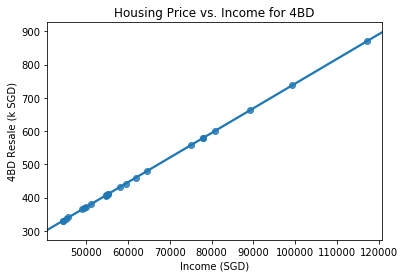

In [60]:
sns.regplot(x='Income (SGD)',y='4BD Resale (k SGD)',data=housing).set_title('Housing Price vs. Income for 4BD')

### 4.2 Housing Price vs. Mean Housing Price
Housing price in each neighborhood is compared to the mean housing price of all neighborhoods living in a 4BD HDB apartment complex. 

This will be meaningful in determining the need for a middle class family. Too low or too high in terms of the housing price will hurt the family financially, therefore the neighborhoods with close-to-average housing price in Singapore will be looked at more closely.

In [61]:
mean_housing_price = housing.mean()
mean_housing_price

Income (SGD)          63152.916667
4BD Resale (k SGD)      469.241667
dtype: float64

In [62]:
#sorting the order of housing prices
housing_sorted = housing.sort_values(['4BD Resale (k SGD)']).reset_index(drop=True)
housing_sorted = housing_sorted.drop(columns=['Income (SGD)'])
housing_sorted

,Areas,4BD Resale (k SGD)
0,Choa Chu Kang,330.0
1,Woodlands,330.0
2,Sembawang,334.9
3,Yishun,340.0
4,Jurong West,365.0
5,Bukit Panjang,368.0
6,Hougang,372.0
7,Bukit Batok,380.0
8,Pasir Ris,405.9
9,Jurong East,407.5


Text(2.5, 480, 'Average SG Housing Price: SGD 469,242')

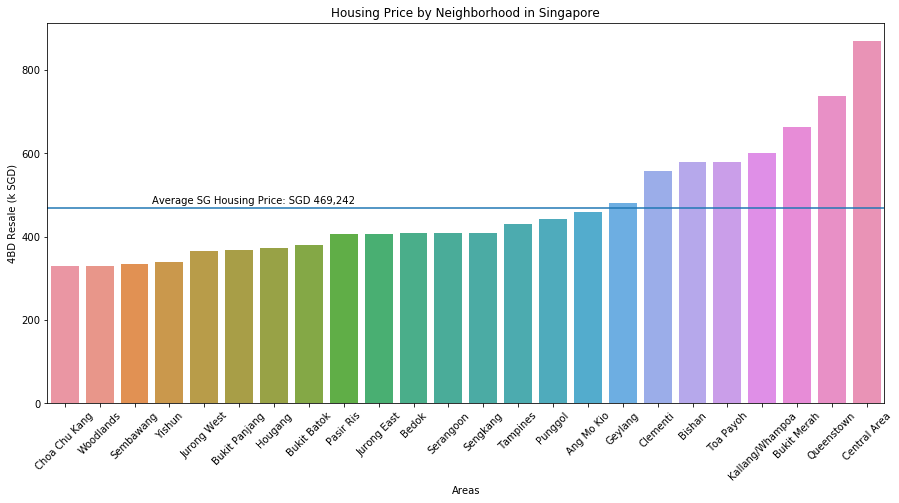

In [63]:
plt.figure(figsize=(15,7))
housing_avg = sns.barplot(x='Areas', y="4BD Resale (k SGD)", data=housing_sorted)
housing_avg.axhline(469.241667)
housing_avg.set_xticklabels(housing_avg.get_xticklabels(), rotation=45)
housing_avg.set_title('Housing Price by Neighborhood in Singapore')
housing_avg.text(2.5,480, "Average SG Housing Price: SGD 469,242")

### 4.3 Housing Price vs. School Count
The number of schools can be used as a good indicator of housing pricing. The total number of schools in each neighborhood will be plotted against the housing price, to gain a general understanding of the trend and effect of number schools on the price. 

In [64]:
# deviation of each neighborhood from mean
# housing_sorted['Dev from Mean'] = housing_sorted(['4BD Resale (k SGD)'] / housing_sorted.mean())
# housing_sorted

In [65]:
housing_school_data = housing.copy()
housing_school_data = housing_school_data.drop(columns=['Income (SGD)'])
housing_school_data['Areas'] = housing_school_data['Areas'].str.upper() 
housing_school_data

,Areas,4BD Resale (k SGD)
0,ANG MO KIO,460.0
1,BUKIT BATOK,380.0
2,BEDOK,408.0
3,BISHAN,580.0
4,BUKIT MERAH,662.5
5,BUKIT PANJANG,368.0
6,CHOA CHU KANG,330.0
7,CLEMENTI,557.5
8,CENTRAL AREA,870.0
9,GEYLANG,480.0


In [66]:
housing_school=pd.merge(housing_school_data, grouped_schools, on='Areas', how='outer', indicator=False)
housing_school

,Areas,4BD Resale (k SGD),Count
0,ANG MO KIO,460.0,14
1,BUKIT BATOK,380.0,13
2,BEDOK,408.0,22
3,BISHAN,580.0,10
4,BUKIT MERAH,662.5,11
5,BUKIT PANJANG,368.0,13
6,CHOA CHU KANG,330.0,15
7,CLEMENTI,557.5,10
8,CENTRAL AREA,870.0,7
9,GEYLANG,480.0,9


Text(0.5, 1.0, 'Housing Price vs. School Count')

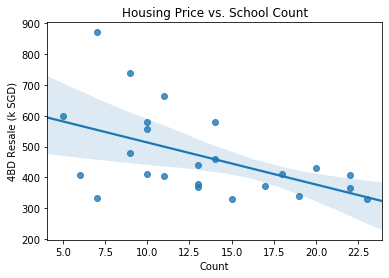

In [67]:
sns.regplot(x='Count',y='4BD Resale (k SGD)',data=housing_school).set_title('Housing Price vs. School Count')

Text(13, 13.5, 'Average Number of Schools = 13.25')

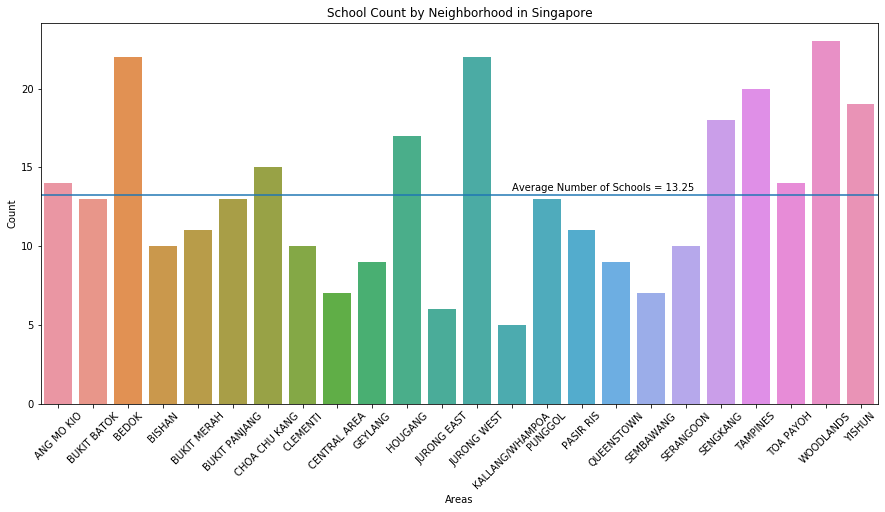

In [68]:
plt.figure(figsize=(15,7))
housing_avg = sns.barplot(x='Areas', y="Count", data=housing_school)
housing_avg.axhline(13.25)
housing_avg.set_xticklabels(housing_avg.get_xticklabels(), rotation=45)
housing_avg.set_title('School Count by Neighborhood in Singapore')
housing_avg.text(13,13.5, "Average Number of Schools = 13.25")

### 4.4 Foursquare API Neighborhood Data

In [69]:
# Restaurants Bar Plot

Text(16, 0.31, 'Average Restaurant Frequency = 0.303')

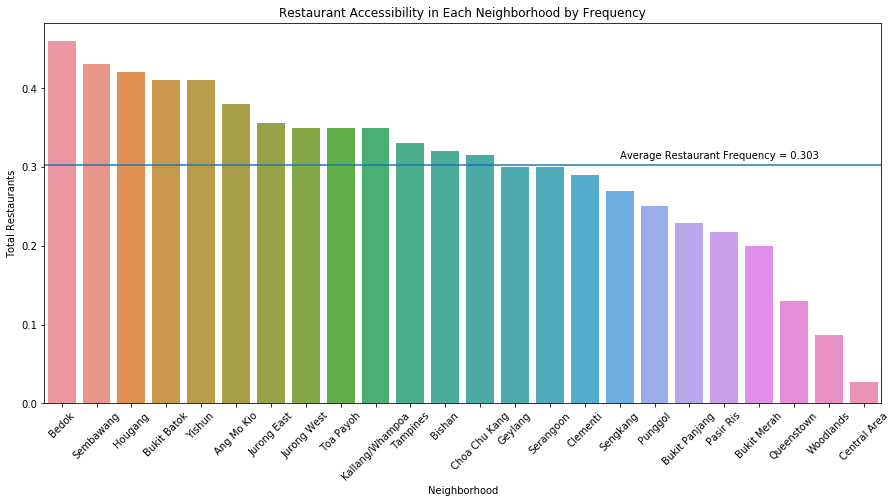

In [70]:
plt.figure(figsize=(15,7))
living_plot = sns.barplot(x='Neighborhood', y="Total Restaurants", data=restaurants)
living_plot.set_xticklabels(living_plot.get_xticklabels(), rotation=45)
living_plot.set_title('Restaurant Accessibility in Each Neighborhood by Frequency')
living_plot.axhline(0.303)
living_plot.text(16,0.31, "Average Restaurant Frequency = 0.303")

Close to 2/3 neighborhoods in Singapore exhibit above-average access to restaurants

Text(13.5, 0.02, 'Average Leisure and Entertainment Frequency = 0.0188')

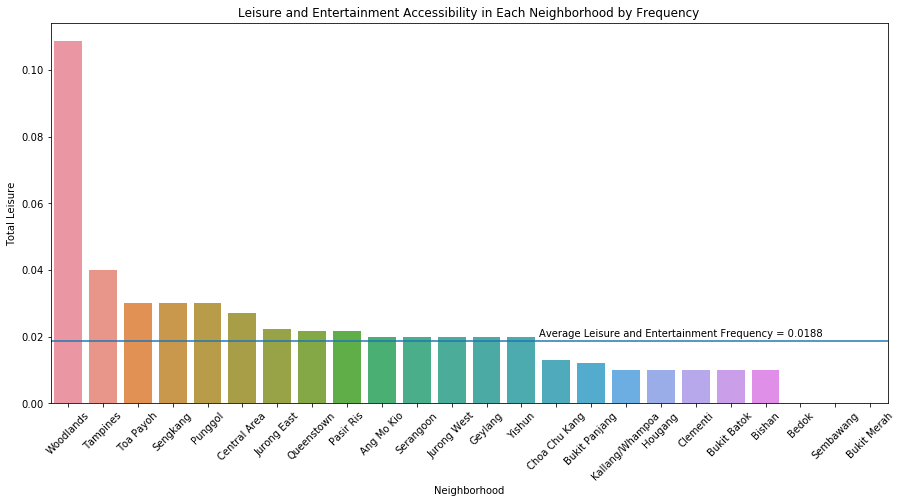

In [71]:
# Leisure Bar Plot
plt.figure(figsize=(15,7))
living_plot = sns.barplot(x='Neighborhood', y="Total Leisure", data=leisure)
living_plot.set_xticklabels(living_plot.get_xticklabels(), rotation=45)
living_plot.set_title('Leisure and Entertainment Accessibility in Each Neighborhood by Frequency')
living_plot.axhline(0.0188)
living_plot.text(13.5,0.02, "Average Leisure and Entertainment Frequency = 0.0188")

Text(10, 0.05, 'Average Living Essentials Frequency = 0.0471')

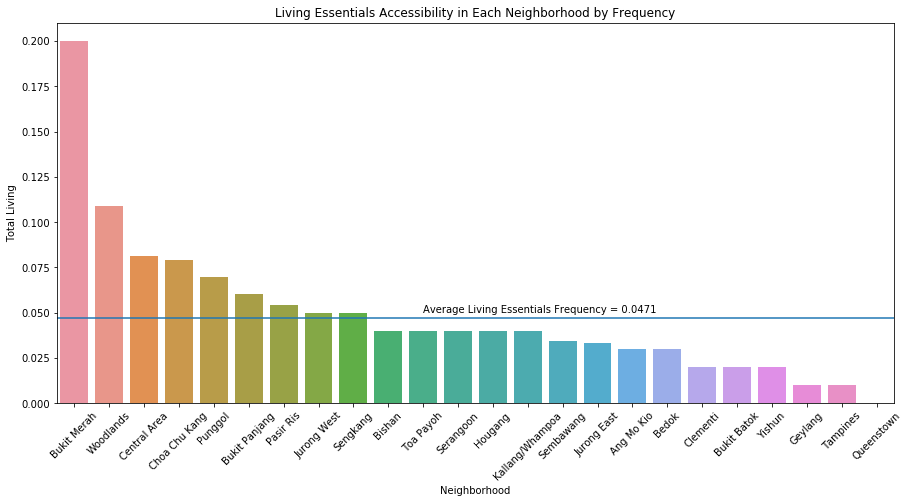

In [72]:
# Living Essentials Bar Plot
plt.figure(figsize=(15,7))
living_plot = sns.barplot(x='Neighborhood', y="Total Living", data=living)
living_plot.set_xticklabels(living_plot.get_xticklabels(), rotation=45)
living_plot.set_title('Living Essentials Accessibility in Each Neighborhood by Frequency')
living_plot.axhline(0.0471)
living_plot.text(10,0.05, "Average Living Essentials Frequency = 0.0471")

### 4.5 Weighted Matrix

In [73]:
final_data_1=pd.merge(foursq_all_data, schools_norm, on='Neighborhood', how='outer', indicator=False)

In [74]:
final_data=pd.merge(final_data_1, housing_norm, on='Neighborhood', how='outer', indicator=False)
final_data = final_data.rename(columns={'Total Living':'Living','Total Restaurants':'Restaurants',
                                       'Total Leisure':'Leisure','Norm School Count':'Norm_School_Count',
                                       'Norm Housing Price':'Norm_Housing_Price'})
final_data

,Neighborhood,Living,Restaurants,Leisure,Norm_School_Count,Norm_Housing_Price
0,BUKIT MERAH,0.200000,0.200000,0.000000,0.125000,0.357886
1,WOODLANDS,0.108696,0.086957,0.108696,0.541667,0.257855
2,CENTRAL AREA,0.081081,0.027027,0.027027,0.347222,0.742145
3,CHOA CHU KANG,0.078947,0.315789,0.013158,0.097222,0.257855
4,PUNGGOL,0.070000,0.250000,0.030000,0.013889,0.051373
5,BUKIT PANJANG,0.060241,0.228916,0.012048,0.013889,0.187485
6,PASIR RIS,0.054348,0.217391,0.021739,0.125000,0.117299
7,JURONG WEST,0.050000,0.350000,0.020000,0.486111,0.193040
8,SENGKANG,0.050000,0.270000,0.030000,0.263889,0.109707
9,BISHAN,0.040000,0.320000,0.010000,0.180556,0.205108


In [75]:
final_data['Evaluated Weight'] = final_data.Living*0.25 + final_data.Restaurants*0.10 + final_data.Leisure*0.15 + final_data.Norm_School_Count*0.15 + final_data.Norm_Housing_Price*0.35
final_data=final_data.sort_values(by=['Evaluated Weight'], ascending=True)
final_data=final_data.set_index('Neighborhood')
final_data

,Living,Restaurants,Leisure,Norm_School_Count,Norm_Housing_Price,Evaluated Weight
Neighborhood,,,,,,
ANG MO KIO,0.030000,0.380000,0.020000,0.041667,0.017114,0.060740
PUNGGOL,0.070000,0.250000,0.030000,0.013889,0.051373,0.067064
GEYLANG,0.010000,0.300000,0.020000,0.236111,0.019923,0.077890
PASIR RIS,0.054348,0.217391,0.021739,0.125000,0.117299,0.098392
BUKIT BATOK,0.020000,0.410000,0.010000,0.013889,0.165262,0.107425
BUKIT PANJANG,0.060241,0.228916,0.012048,0.013889,0.187485,0.107462
SERANGOON,0.040000,0.300000,0.020000,0.180556,0.109707,0.108481
CLEMENTI,0.020000,0.290000,0.010000,0.180556,0.163441,0.119788
SENGKANG,0.050000,0.270000,0.030000,0.263889,0.109707,0.121981


# 5.0 Discussions

See report and presentation.

# 6.0 Conclusion

### Ang Mo Kio Neighborhood Visualization

In [76]:
#Ang Mo Kio Mapping in Folium

# import libraries
import folium
import pandas as pd
 
# Make a data frame with dots to show on the map
AMK = pd.DataFrame({'amk_lat':[1.37007],'amk_lon':[103.84952],'amk_name':['Ang Mo Kio']})
 
# create map of Singapore
AMK_map = folium.Map(location=[latitude, longitude], zoom_start=10.5)
AMK_map

    
# Make an empty map
m = folium.Map(location=[20, 0], tiles="Mapbox Bright", zoom_start=2)

markers_colors = []
for lat, lon, poi in zip(AMK['amk_lat'], 
                         AMK['amk_lon'], 
                         AMK['amk_name']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label).add_to(AMK_map)

AMK_map
